# D208 - Data Modelling Performance Assessment
Aidan Soares, 012042436, July 1, 2024, Western Governors University

### A1: Research Question
My research question for this assessment is "What variables impact customer churn?" using the churn dataset provided by WGU. Within the telecommunications industry the competition is fierce, with significant amounts of operating expenses being dedicated to ad campaigns in bolstering customer onboarding and market capitalization. Due to this, the environment among clientele sees fast turnover as customers can just cancel service with their ISP just a phone call. The loss on consistent tenure and resources needed to replace customer base is detrimental to a telecomm company's finances, thus ideally a preventative approach to customer retention is necessary to save on costs. In the pursuit of customer preservation it is imperative that telecommunication companies seek to identify the variables that impact customer churn, in doing so the company may be able to identify when a customer is at risk of ending their service contract, allowing the company to step in to maintain the relationship, provide additional service benefits, or remediate pain points that the customer is encountering. Overall, a strong focus on the surrounding variables that impact customer churn builds a metric system for focusing on better customer relations, strengthing retention and brand appeal.

### A2: Goals
The main goal of this assessment is to identify the independant variables within my dataset that demonstrate a statistical likelihood of influencing my dependant variable Churn. In doing so, I'll be able to create a pool of predictor variables that indicate when a customer may churn and terminate their service contract.

### B1: Assumptions
There are multiple major assumptions of logistic regression I must focus on for this assessment:
- The response variable must be a binary categorical variable. As our dependant variable churn contains only respones in a yes/no format, it will be perfect for logistic regression.
- The observations must by independant of each other. Should the entries have matched data or repeated measurements it could cause similar issues to multicollinearity within my longistic regression model. Leading to the next assumption:
- Logistic regression requires that there be little to no multicollinearity between the independant variables. If this were to occur, statistically significant relationships would be present among my predictor variables, resulting in my independant variables no longer being independant, and incorrect conclusions would be drawn from my assessment. To combat this I will be performing VIF analysis similarly to Task 1.
- There must be a linear relationship between the independant variables (x) and the log odds of the dependant variable churn (y). This is unique from linear regression as the log odd of y represents the probability pool within the range from 0 to 1. Since my dependant variable can only result in yes or no, the correlation must be in the form of a linear relationship independant variable and log odds.
- Logistic regression also requires a large sample size to be conducted. As our sample size is 10000 observations this should suit our analysis fine, and for the purposes of this assessment I will be selecting a batch of 12 variables to conduct analysis on to ensure a greater diversity within the analysis.
- Finally, there can be no extreme outliers within my variables that negatively skew the regression line for my overall plot. Outliers will be identified within the data cleaning stage and removed through imputation or removal if necessary.

### B2: Benefits of Python
For this assessment I am opting to use python to conduct my analysis for two main reasons:
- It is a relatively simple programming language to utilize for larger scale data processing. This allows me to clean and manipulate the significant amount of data provided within the csv file at scale, granting me the ability to quickly remove errors, null values and duplicates from the dataset. I can then conduct my analysis much more efficiently.
- Python has access to a wide variety of libraries that are perfectly suited to conducting the statistical analysis needed to answer my research question. Pandas has tools to build and manipulate dataframes, scipy is great for performing calculations for statistical significance that can ensure reliability in the logistic regression model, and I will also be utilizing libraries such as seaborn and matplotlib to build visual representations of data relationships between independant variables and the dependant variable.

### B3: Justification for Logistic Regression
Logistic regression is a modelling technique used to assess the relationship between multiple independant variables and one categorical dependant variable. As the dependant variable (churn) is categorical, containing only observations in the form of "yes" and "no", logistic regression would be the perfect modelling technique in analyzing our research question. Furthermore, this modelling technique will be necessary in isolating the dependant variables that a statistically significant correlation with customer churn, allowing me to generate actionable prediction insights into when a customer is likely to terminate their service contract.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#importing dataset into a dataframe
df = pd.read_csv('churn_clean.csv', index_col=0)

### C1: Data Cleaning
First and foremost I want to assess the current quality of the churn data imported from the csv. To do so, I will utilize the .info() function on my dataframe to grab a high-level overview of the data each column houses. Should there be any null values present within the dataset, imputation will be required. I will also do a cursory check on the total number of .duplicated() results within my dataframe, as duplicates will need to be removed immediately. 

Once those preliminary checks are done I want to rename the titles of the columns 'Item 1-8' to make them more readable from a glance as they currently do not denote any meaning. Even if these variables end up not being used in my logistic regression model, changing them to a more comprehensive format will make future analysis for myself and other analysis easier to understand. 

I will then be re-expressing the nominal categorical data for variables selected as ordinal data or through one hot encoding for more effective analysis. Details to follow in section C3 and C4.

In [3]:
# Generating overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

As there are no null values, no imputation will be performed.

In [4]:
df.duplicated().value_counts()

False    10000
dtype: int64

In [5]:
#Changing the names of item1-8 columns for better clarity based on the data dictionary
itemnames = {"Item1" : "timely_responses",
             "Item2" : "timely_fixes",
             "Item3" : "timely_replacements",
             "Item4" : "reliability",
             "Item5" : "options",
             "Item6" : "respectful_response",
             "Item7" : "courteous_exchange",
             "Item8" : "evidence_of_active_listening"}

df.rename(columns=itemnames, inplace=True)

#ensuring the changes have occurred
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


No duplicate values exist within the dataset so there are no entries that need to be dropped.

### C2: Summary Statistics
The dependant variable (Churn), and independent variables I have selected for my logistic regression model are as follows, joined by their respective statistical summaries:
Additional summary of observations will be provided at the bottom.

**Churn**

In [6]:
df.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

**Email**

In [7]:
df.Email.describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

**Techie**

In [8]:
df.Techie.value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

**Contract**

In [9]:
df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

**Port Modem**

In [10]:
df.Port_modem.value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

**Tablet**

In [11]:
df.Tablet.value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

**Internet Service**

In [12]:
df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

**Phone**

In [13]:
df.Phone.value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

**Online Security**

In [14]:
df.OnlineSecurity.value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

**Online Backup**

In [15]:
df.OnlineBackup.value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

**Device Protection**

In [16]:
df.DeviceProtection.value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

**Tech Support**

In [17]:
df.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

**Streaming Movies**

In [18]:
df.StreamingMovies.value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

**Summary**
- Churn: Within the last month 2650 customers have churned while 7350 customers have retained active service subscription.
- Email: Average emails that a customer receives from the telecommunications company is 12, with the highest amount being 23, and the minimum being 1.
- Techie: Currently most customers self declare as non-techies (8321), while 1679 indicated that they are technically inclined.
- Contract Type: Over half of customers subscribe to their telecom plans on a month-to-month basis. The second most popular subscription model being two year plans, followed by one year plans.
- Port Modem: 4834 customers currently have a port modem, while 5166 customers do not.
- Tablet: Majority (7009) of customers do not own a tablet, 2991 do.
- Internet Service Type: Fiber optic is the most popular internet service type available, followed by DSL, with the least popular selection being no internet service.
- Phone: A strong majority of customers (9067) have phones, about 10% (933) of customers do not.
- Online Security: about 2/3 of customers have not opted for the online security package (6424). 3576 customers currently have online security.
- Online Backup: Most (5494) customers do not have online backup, 4506 do.
- Device Protection: Similarly to online backup, 5614 customer have not opted for this service add-on, while 4386 have.
- Tech Support: Over 60% (6250) of customers have not opted to buy tech support for their service plans. Only 3750 customers have tech support.
- Streaming Movies: Most (5110) customers do not have streaming movies, while 4890 do.

### C3: Visualization
Overview of distribution for Churn

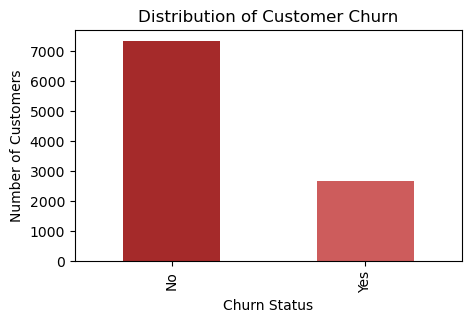

In [19]:
#Plotting the univarite distribution of Churn
df["Churn"].value_counts().plot(
    kind="bar", title="Distribution of Customer Churn", ylabel="Number of Customers",
    xlabel="Churn Status", figsize=(5,3), color=['brown','indianred'])
plt.show()

Text(0, 0.5, 'Number of Customers')

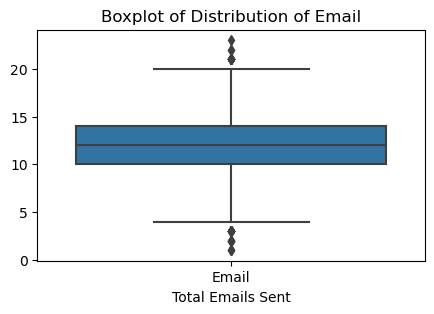

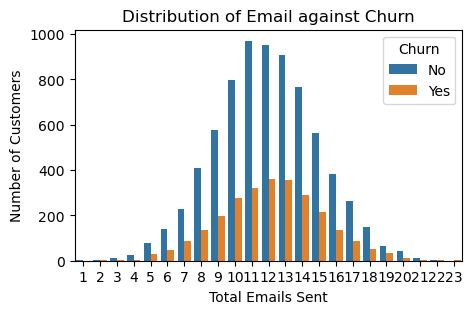

In [20]:
#Plotting the univarite distribution of Email and the bivariate distribution of Email against Churn
plt.figure(figsize=(5,3))
plt.title("Boxplot of Distribution of Email")
sns.boxplot(data=df[['Email']])
plt.xlabel("Total Emails Sent")

plt.figure(figsize=(5,3))
plt.title("Distribution of Email against Churn")
sns.countplot(data=df, x="Email", hue="Churn")
plt.xlabel("Total Emails Sent")
plt.ylabel("Number of Customers")

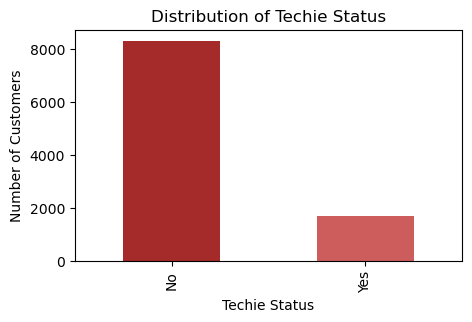

Text(0, 0.5, 'Number of Customers')

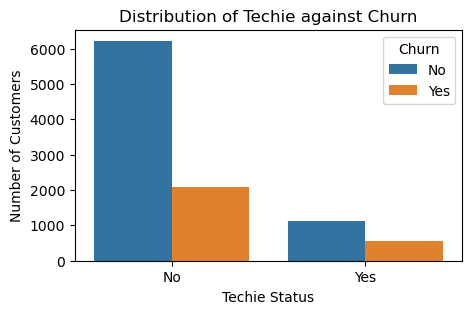

In [21]:
#Plotting the univarite distribution of Techie and the bivariate distribution of Techie against Churn
df["Techie"].value_counts().plot(
    kind="bar", title="Distribution of Techie Status", ylabel="Number of Customers",
    xlabel="Techie Status", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Techie against Churn")
sns.countplot(data=df, x="Techie", hue="Churn")
plt.xlabel("Techie Status")
plt.ylabel("Number of Customers")

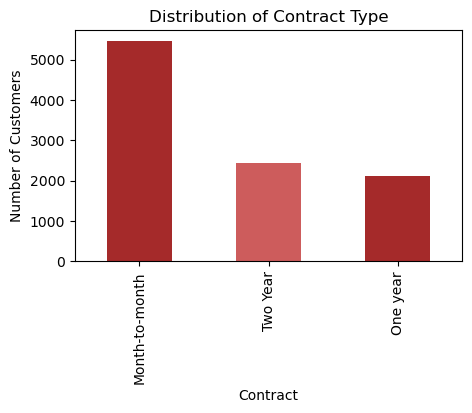

Text(0, 0.5, 'Number of Customers')

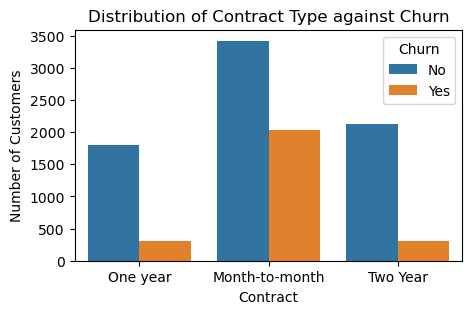

In [22]:
#Plotting the univarite distribution of Contract Type and its bivariate distribution against Churn
df["Contract"].value_counts().plot(
    kind="bar", title="Distribution of Contract Type", ylabel="Number of Customers",
    xlabel="Contract", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Contract Type against Churn")
sns.countplot(data=df, x="Contract", hue="Churn")
plt.xlabel("Contract")
plt.ylabel("Number of Customers")

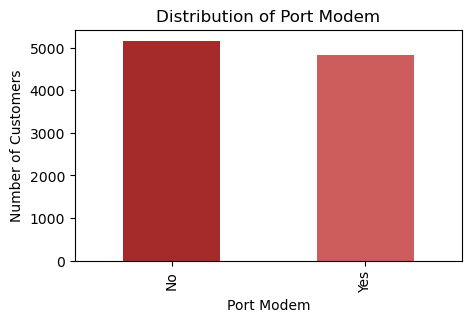

Text(0, 0.5, 'Number of Customers')

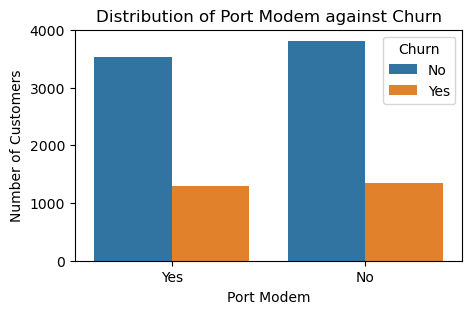

In [23]:
#Plotting the univarite distribution of Port Modem and its bivariate distribution against Churn
df["Port_modem"].value_counts().plot(
    kind="bar", title="Distribution of Port Modem", ylabel="Number of Customers",
    xlabel="Port Modem", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Port Modem against Churn")
sns.countplot(data=df, x="Port_modem", hue="Churn")
plt.xlabel("Port Modem")
plt.ylabel("Number of Customers")

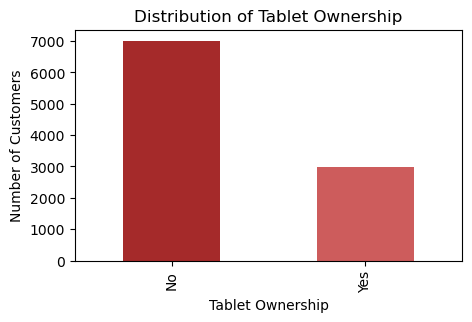

Text(0, 0.5, 'Number of Customers')

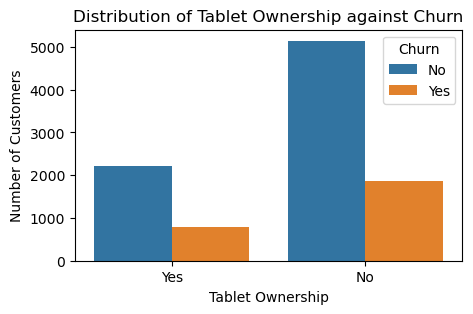

In [24]:
#Plotting the univarite distribution of Tablet ownership and its bivariate distribution against Churn
df["Tablet"].value_counts().plot(
    kind="bar", title="Distribution of Tablet Ownership", ylabel="Number of Customers",
    xlabel="Tablet Ownership", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Tablet Ownership against Churn")
sns.countplot(data=df, x="Tablet", hue="Churn")
plt.xlabel("Tablet Ownership")
plt.ylabel("Number of Customers")

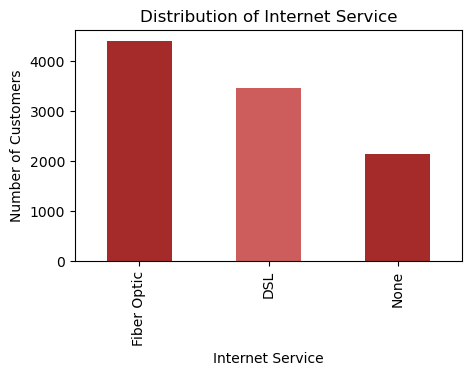

Text(0, 0.5, 'Number of Customers')

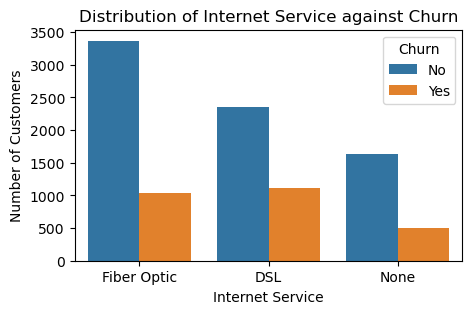

In [25]:
#Plotting the univarite distribution of Internet Service and its bivariate distribution against Churn
df["InternetService"].value_counts().plot(
    kind="bar", title="Distribution of Internet Service", ylabel="Number of Customers",
    xlabel="Internet Service", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Internet Service against Churn")
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")

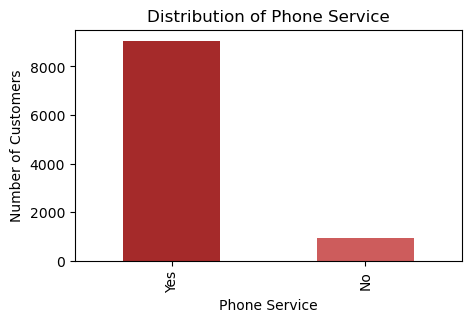

Text(0, 0.5, 'Number of Customers')

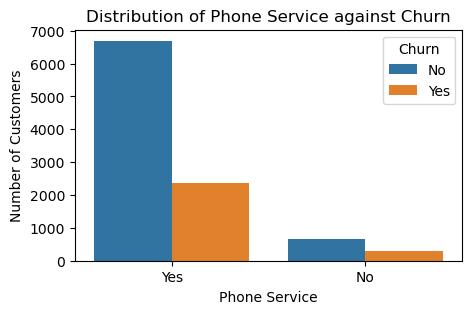

In [26]:
#Plotting the univarite distribution of Phone Service and its bivariate distribution against Churn
df["Phone"].value_counts().plot(
    kind="bar", title="Distribution of Phone Service", ylabel="Number of Customers",
    xlabel="Phone Service", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Phone Service against Churn")
sns.countplot(data=df, x="Phone", hue="Churn")
plt.xlabel("Phone Service")
plt.ylabel("Number of Customers")

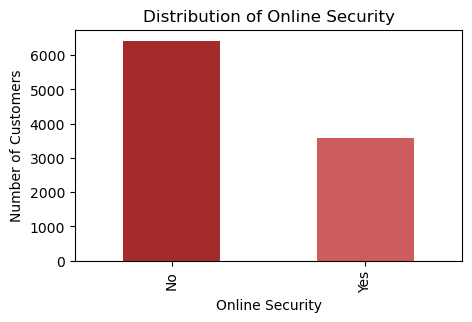

Text(0, 0.5, 'Number of Customers')

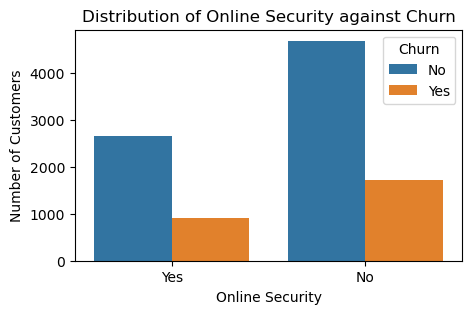

In [27]:
#Plotting the univarite distribution of Online Security and its bivariate distribution against Churn
df["OnlineSecurity"].value_counts().plot(
    kind="bar", title="Distribution of Online Security", ylabel="Number of Customers",
    xlabel="Online Security", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Online Security against Churn")
sns.countplot(data=df, x="OnlineSecurity", hue="Churn")
plt.xlabel("Online Security")
plt.ylabel("Number of Customers")

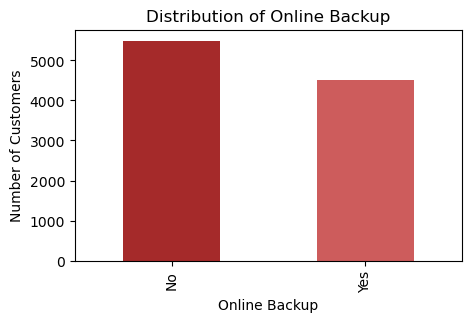

Text(0, 0.5, 'Number of Customers')

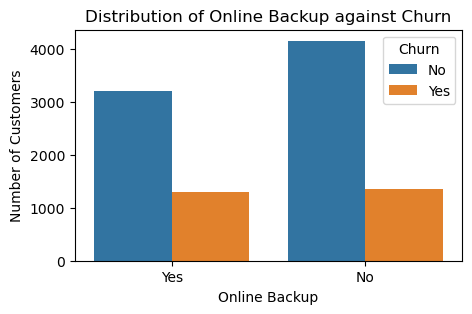

In [28]:
#Plotting the univarite distribution of Online Backup and its bivariate distribution against Churn
df["OnlineBackup"].value_counts().plot(
    kind="bar", title="Distribution of Online Backup", ylabel="Number of Customers",
    xlabel="Online Backup", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Online Backup against Churn")
sns.countplot(data=df, x="OnlineBackup", hue="Churn")
plt.xlabel("Online Backup")
plt.ylabel("Number of Customers")

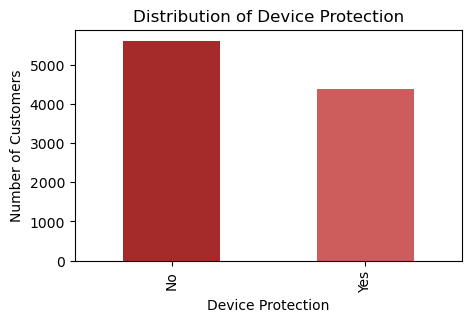

Text(0, 0.5, 'Number of Customers')

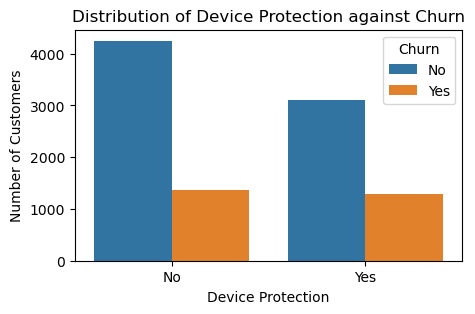

In [29]:
#Plotting the univarite distribution of Device Protection and its bivariate distribution against Churn
df["DeviceProtection"].value_counts().plot(
    kind="bar", title="Distribution of Device Protection", ylabel="Number of Customers",
    xlabel="Device Protection", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Device Protection against Churn")
sns.countplot(data=df, x="DeviceProtection", hue="Churn")
plt.xlabel("Device Protection")
plt.ylabel("Number of Customers")

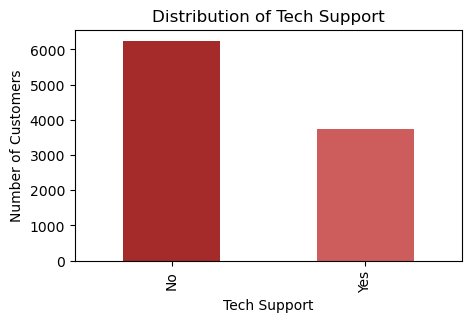

Text(0, 0.5, 'Number of Customers')

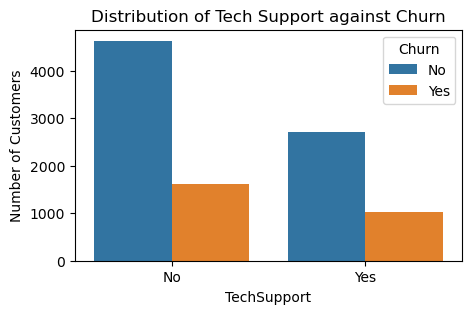

In [30]:
#Plotting the univarite distribution of Tech Support and its bivariate distribution against Churn
df["TechSupport"].value_counts().plot(
    kind="bar", title="Distribution of Tech Support", ylabel="Number of Customers",
    xlabel="Tech Support", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Tech Support against Churn")
sns.countplot(data=df, x="TechSupport", hue="Churn")
plt.xlabel("TechSupport")
plt.ylabel("Number of Customers")

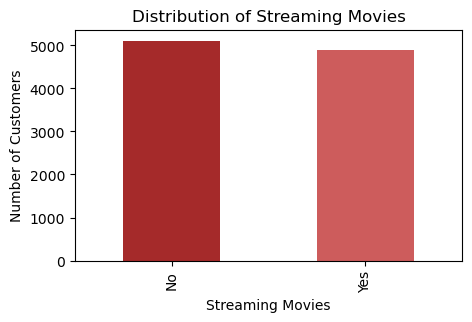

Text(0, 0.5, 'Number of Customers')

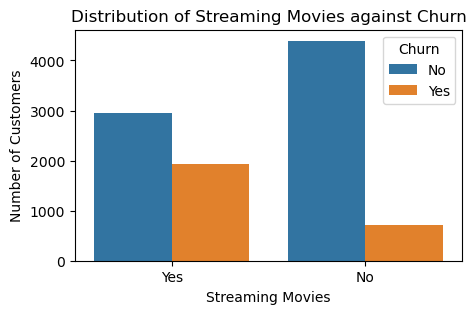

In [31]:
#Plotting the univarite distribution of Streaming Movies and its bivariate distribution against Churn
df["StreamingMovies"].value_counts().plot(
    kind="bar", title="Distribution of Streaming Movies", ylabel="Number of Customers",
    xlabel="Streaming Movies", figsize=(5,3), color=['brown','indianred'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Distribution of Streaming Movies against Churn")
sns.countplot(data=df, x="StreamingMovies", hue="Churn")
plt.xlabel("Streaming Movies")
plt.ylabel("Number of Customers")

### C4: Data Transformation
From the analysis conducted, I made a point to review potential outliers within the Emails columns of my dataset. Plotting it on a boxplot we can see that there are a few data points that sit outside the whiskers of my plot, indicating that these are outliers. As per the assumptions of logistic regression, I cannot maintain any *extreme* outliers, but in reviewing the emails variable, the outliers do not indicate an extreme magnitude of variance from the mean. As such, the variable will remain as is.

As mentioned above, I will need to re-express binary categorical variables to 1 and 0 to indicate "Yes" or "No" status. Additionally, the categorical variables that have more that just "Yes" and "No" binary responses will need to be re-expressed using one hot encoding. Essentially, this process creates dummy variables to store a binary indicator for each data entry. For example, looking at Internet Service Type, if a customer has Fiber Optic service, the Fiber Optic dummy variable would contain a "1" while the DSL and No Service variables would contain "0" to indicate that this customer has Fiber Optic. 

When using one hot encoding I must ensure not to include all the dummy variables within my resulting dataframe, as keeping all of the dummy variables will result in multicollinearity. Therefore, going with the Internet Service example I will drop the first of the three dummy variables to my new dataframe, but even if I am missing the DSL column, having a "0" in both Fiber Optic and No Service will indicate that the customer has DSL so it also reduces redundancy in my dataframe.

Finally, I will store only the relevant variables being used for my logistic regression model and then export said dataframe into a csv file. As any continuous variables require no imputation or transformation, I can simply just create a new dataframe and input those variables first.

In [32]:
#creating new dataframe for logistic regression using only independant variables prior to data transformation
LR_df = df[["Email", "Contract", "InternetService"]]

#Re-expressing all binary responses to ordinal encoding and adding it to the end of my LR dataframe
LR_df.insert(0, "Churn", df["Churn"].replace({"Yes": 1, "No": 0}))
LR_df.insert(2, "Techie", df["Techie"].replace({"Yes": 1, "No": 0}))
LR_df.insert(3, "Port_modem", df["Port_modem"].replace({"Yes": 1, "No": 0}))
LR_df.insert(4, "Tablet", df["Tablet"].replace({"Yes": 1, "No": 0}))
LR_df.insert(5, "Phone", df["Phone"].replace({"Yes": 1, "No": 0}))
LR_df.insert(6, "OnlineSecurity", df["OnlineSecurity"].replace({"Yes": 1, "No": 0}))
LR_df.insert(7, "OnlineBackup", df["OnlineBackup"].replace({"Yes": 1, "No": 0}))
LR_df.insert(8, "DeviceProtection", df["DeviceProtection"].replace({"Yes": 1, "No": 0}))
LR_df.insert(9, "TechSupport", df["TechSupport"].replace({"Yes": 1, "No": 0}))
LR_df.insert(10, "StreamingMovies", df["StreamingMovies"].replace({"Yes": 1, "No": 0}))


#Performing one-hot encoding on the categorical variables with 3 or more selections and dropping the 
#first dummies to prevent perfect multicollinearity 
LR_df = pd.get_dummies(LR_df, columns=["Contract", "InternetService"], drop_first=True)

#Printing my LR dataframe to check if it was constructed correctly
LR_df.head()

,Churn,Email,Techie,Port_modem,Tablet,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None
CaseOrder,,,,,,,,,,,,,,,
1,0,10,0,1,1,1,1,1,0,0,1,1,0,1,0
2,1,12,1,0,1,1,1,0,0,0,1,0,0,1,0
3,0,9,1,1,0,1,0,0,0,0,1,0,1,0,0
4,0,15,1,0,0,1,1,0,0,0,0,0,1,0,0
5,1,16,0,1,0,0,0,0,0,1,0,0,0,1,0


### C5: Prepared Dataset
Below is the code I have used to export my cleaned and transformed dataset containing only the variables needed to conduct my logistic regression analysis, omitting the index column that was originally imported. This csv file will be submitted alongside my Jupiter notebook.

In [33]:
#exporting dataset to csv file
LR_df.to_csv('lr_dataset.csv', index=False)

### D1: Initial Logistic Regression

In [34]:
#Creating logistic regression model (Li, 2017)
lr_model = sm.Logit(LR_df["Churn"], LR_df.drop(columns=["Churn"]).assign(const=1))
lr_result = lr_model.fit()
print(lr_result.summary())

Optimization terminated successfully.
         Current function value: 0.482633
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.1653
Time:                        11:16:26   Log-Likelihood:                -4826.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Email                           0.0120      0.008      1.451      0.147   

In [35]:
#calculating the AIC of my initial logistic regression model (Zach, 2021)
print(lr_result.aic)

9682.657885395085


### D2: Jusitification of Reduction
To begin, I have chosen to utilize the Variance Inflation Factors (VIF) of my independant variables in reducing multicollinearity between my independant variables, much like within Task 1's MLR model. VIF values over 5 demonstrate moderate correlation between my independant variables, while 10 indicate a strong correlation. As such, I will drop any independant variables with a VIF over 5 from my model. This will be done iterating through my analysis, dropping the highest VIF, then running the analysis, repeating until there are no variables with a VIF above 5 (Keith, 2021).

In [36]:
#Conducting VIF analysis with all variables except the dependant variable (Keith, 2021)
X = LR_df.drop(columns=["Churn"])

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
vif_df

,feature,VIF
0,Email,9.046057
1,Techie,1.194396
2,Port_modem,1.891214
3,Tablet,1.415388
4,Phone,7.665120
5,OnlineSecurity,1.532171
6,OnlineBackup,1.773485
7,DeviceProtection,1.741908
8,TechSupport,1.577389
9,StreamingMovies,1.907685


In [37]:
#Conducting VIF analysis after dropping Email
X = LR_df.drop(columns=["Churn", "Email"])

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
vif_df

,feature,VIF
0,Techie,1.189913
1,Port_modem,1.840910
2,Tablet,1.405989
3,Phone,5.126905
4,OnlineSecurity,1.519710
5,OnlineBackup,1.740843
6,DeviceProtection,1.703133
7,TechSupport,1.542532
8,StreamingMovies,1.862366
9,Contract_One year,1.352744


In [38]:
#Conducting VIF analysis after dropping Phone
X = LR_df.drop(columns=["Churn", "Email", "Phone"])

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
vif_df

,feature,VIF
0,Techie,1.176306
1,Port_modem,1.733389
2,Tablet,1.365308
3,OnlineSecurity,1.475456
4,OnlineBackup,1.656565
5,DeviceProtection,1.644808
6,TechSupport,1.481965
7,StreamingMovies,1.759491
8,Contract_One year,1.306408
9,Contract_Two Year,1.353140


Now that potential multicollinearity issues have been resolved, I want to proceed with feature reduction that results only in the independant variables that demonstrate significant influence on customer churn. To do so, I will once again be conducting backwards stepwise elimination just like I have done for Task 1. To re-iterate, this process will require me to conduct my logistic regression model to survey all the p-values of my independant variables. I am establishing an alpha of 0.05, any variable with a p-value of less than that amount demonstrates a statistical significance in the relationship to my dependant variable (Tripathi, 2019). Therefore, I only want variables with p-values of less than 0.05 within my final reduced logistic regression model. Following the creation of my logistic regression model I will remove the variable with the highest p-value above 0.05 in my next model. This will be done until all the variables remaining have p-values less than 0.05, resulting in only the independant variables that demonstrate actual influence in my dependant variable.

In [39]:
#Conducting backwards stepwise elimination on highest p-values above 0.05 for 
#logistic regression model after dropping variables from VIF analysis
lr_model = sm.Logit(LR_df["Churn"], LR_df.drop(columns=["Churn", "Email", "Phone"]).assign(const=1))
lr_result = lr_model.fit()
print(lr_result.summary())

Optimization terminated successfully.
         Current function value: 0.482949
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.1648
Time:                        11:20:09   Log-Likelihood:                -4829.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Techie                          0.4845      0.064      7.537      0.000   

In [40]:
#Creating logistic model after dropping Port Modem column
lr_model = sm.Logit(LR_df["Churn"], LR_df.drop(columns=["Churn", "Email", "Phone", 
                                                        "Port_modem"]).assign(const=1))
lr_result = lr_model.fit()
print(lr_result.summary())

Optimization terminated successfully.
         Current function value: 0.482965
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.1647
Time:                        11:21:00   Log-Likelihood:                -4829.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Techie                          0.4839      0.064      7.528      0.000   

In [41]:
#Creating logistic model after dropping Tablet column
lr_model = sm.Logit(LR_df["Churn"], LR_df.drop(columns=["Churn", "Email", "Phone", 
                                                        "Port_modem", "Tablet"]).assign(const=1))
lr_result = lr_model.fit()
print(lr_result.summary())

Optimization terminated successfully.
         Current function value: 0.482986
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.1647
Time:                        11:21:12   Log-Likelihood:                -4829.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Techie                          0.4837      0.064      7.526      0.000   

### D3: Reduced Logistic Regression Model
Below is the resulting reduced logistic model with only the independant variables that demonstrate statistical significance in the relationship with my dependant variable. My feature selection process involved first reducing any potential multicollinearity issues by performing analysis on the variance inflation factors for my variables, removing any variables with a VIF value over 5 one by one. I then performed a similar backwards elimination on the p-values of the model, to isolate statistically significant variables. After the selection process, the only remaining variables are:
- Techie
- Online Backup
- Device Protection
- Tech Support
- Streaming Movies
- One Year Contracts
- Two Year Contracts
- Fiber Optic
- No Internet Service

Per my LLR-p-value of my model of less than 0.05, my model desmonstrates usefulness and demonstrates the capapbility of predicting the value of the response variable. 

In [42]:
#Creating final reduced logistic model after dropping Online Security column
rlr_model = sm.Logit(LR_df["Churn"], LR_df.drop(columns=["Churn", "Email", "Phone", 
                                                        "Port_modem", "Tablet", "OnlineSecurity"]).assign(const=1))
rlr_result = rlr_model.fit()
print(rlr_result.summary())

Optimization terminated successfully.
         Current function value: 0.483103
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.1645
Time:                        11:22:06   Log-Likelihood:                -4831.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Techie                          0.4841      0.064      7.533      0.000   

In [43]:
#printing Akaike information criterion of reduced model
print(rlr_result.aic)

9682.050760367323


### E1: Model Comparison
Looking at the resulting model, it has been reduced by 5 variables as compared to it initial version, containing only statistically significant variables to customer churn. Additionally, any potential multicollinearity issues have been mitigated to align better with my assumptions of logisitc regression.

Typically, to compare the initial logistic regression model to the final reduced model I would compare the LLR p-value between the two. However, as they both demonstrate extremely low values (0.000), I can identify both to be statistically important the prediction of my dependant variable, neither being a *better* fit per-se than the other. Alternatively, I have selected Akaike's Information Criteria (AIC) in my model comparison. The model's AIC is a determining value that can estimate prediction error of my model, thus a model would demonstrate better prediction capabilities through a lower AIC. Looking at the initial logistic regression model, the lr_result has an AIC of 9682.66, while the reduced model's (rlr_result) AIC value is 9682.05. This does demonstrate that the reduced model is more effective in generating predictions of my dependant variable but just as with the LLR p-value, the reduced model is only a marginal improvement from the initial model.

### E2: Confusion Matrix
The below is the creation of the confusion matrix for the reduced logistic regression model, alongside its accuracy calculation. Code was learned through W3Schools (W3Schools, 2024).

Accuracy of logistic regression model: 0.7403333333333333


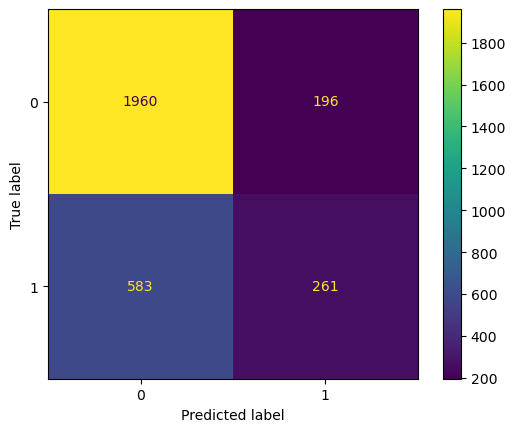

In [45]:
#establishing the variables 
X = LR_df.drop(columns=["Churn", "Email", "Phone", "Port_modem", "Tablet", "OnlineSecurity"]).assign(const=1)
y = LR_df["Churn"]

#creating confusion model with accuracy (W3Schools, 2024)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logregmodel = LogisticRegression()
logregmodel.fit(X_train, y_train)
y_pred = logregmodel.predict(X_test)
print('Accuracy of logistic regression model: '+ str((logregmodel.score(X_test, y_test))))
lrconfusion_matrix = confusion_matrix(y_test, y_pred)

#plotting the results from the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = lrconfusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show() 

As can be seen from the above, the confusion matrix generated for the reduced logistic regression model has predicted 1960 true negatives and 261 true positives, these are correct predictions. Conversely, the model predicted 196 false positives and 583 false negatives, these are incorrect predictions. Overall, the model has a solid level of accuracy in its predictions, as demonstrated by the true predictions made as well as the calculated accuracy score of 74%.

Following this I would like to calculate the log-odds of the independant variables within my reduced model.

In [46]:
#storing the coefficients of my variables in a variable for log odds calculation
coefficients = rlr_result.params

#converting coefficients to log odds
for var, coef in coefficients.items():
    print("Odds ratio for " + str(var) + " is: " + str((round(np.exp(coef),4))))

Odds ratio for Techie is: 1.6227
Odds ratio for OnlineBackup is: 1.3071
Odds ratio for DeviceProtection is: 1.3203
Odds ratio for TechSupport is: 1.1341
Odds ratio for StreamingMovies is: 4.683
Odds ratio for Contract_One year is: 0.2446
Odds ratio for Contract_Two Year is: 0.2073
Odds ratio for InternetService_Fiber Optic is: 0.581
Odds ratio for InternetService_None is: 0.5722
Odds ratio for const is: 0.2509


### E3: Code
Code for all calculations required for implementation of the logistic regression model can be found above within the Section D. The final reduced model, confusion matrix, accuracy calculation, and log odds calculations can be found above within section E.

### F1: Results
**Regression Equation/Interpretation**

$ln\frac{\hat{p}}{(1-\hat{p})}$ = -1.3829 + 0.4841(Techie) + 0.2678(OnlineBackup) + 0.2779(DeviceProtection) + 0.1259(TechSupport) + 1.5439(StreamingMovies) - 1.4080(Contract_One year) - 1.5737(Contract_Two Year) - 0.5431(InternetService_Fiber Optic) - 0.5583(InternetService_None)

To elaborate on the above, keeping all things constant:
- A customer that is a techie increases the log odds of churn by 0.4841
- A customer that has online backup increases the log odds of churn by 0.2678
- A customer that has device protection increases the log odds of churn by 0.2779
- A customer that has tech support increases the log odds of churn by 0.1259
- A customer that has streaming movies increases the log odds of churn by 1.5439
- A customer that has a one year contract decreases the log odds of churn by 1.4080
- A customer that has a two year contract decreases the log odds of churn by 1.5737
- A customer that has a fiber optic decreases the log odds of churn by 0.5431
- A customer that has a no internet service decreases the log odds of churn by 0.5583

**Statistical/Practical Significance**

From a statistical standpoint, the reduced logistic regression model has a LLR p-value of 0.000, this value is less than the 0.05 needed to declare statistical significance in the prediction of customer churn. Thus, the reduced model is a good fit in forming statistically appropriate predictions for my dependant variable.

As for practical significance, we can see above that the reduced logistic model has an accuracy of 74%. This number demonstrates an applicable use for this model, but cannot give predictions that are fully accurate. Practically speaking, I believe the model can still be utilized as a general guideline in predicting customer churn and the indicator variables that lead to churn. There is however a bit of difficulty in applying the regression equation practically for the purposes of ad campaigns or service package plans. Features such as online backup, device protection, and movie streaming all demonstrate a positive correlation with the log odds of a customer churning in a given month, but these are beneficial service packages and offerings to customers. Trying to pursue a decrease in customer churn by turning customers away from these features would be impractical as it would be a loss to the telecommunication services available for customers to choose from, and would be detrimental to customer appeal/retention in the long run.

**Limitations**

As with task 1, the dataset provided is limited in scope, I do not believe that a population 10,000 customers is enough entries to really develop a strong meaningful relationship between the variables. Another major limitation of the dataset used for this assessment can be found within some of the variables obtained through surveying customers. Take the techie column for example, it is quite vague for a person to understand what constitutes a 'technically inclined' understanding or skillset relating to internet service provision as this definition varies from one person to another. I may have a better understanding of emails, applications, browsers, or general use of a computer than someone else, but I still would not consider myself a techie because I don't really know how to troubleshoot network issues or computer bugs. Because of this, some of the survey categories may not paint an accurate picture of a person's technological savvy, and can introduce skew into our resulting model.

### F2: Recommendations
As stated above, variables with odds ratios above 1 such as online backup, device protection, tech support, and streaming movies are all service offerings that demonstrate a positive correlation with the log odds of churn. However, these services generate profit for the company and are a valuable part of customer appeal and choice selection. As such, based on the model generated these offerings should not be reduced, nor should the company strive to convince customers to cancel these service packages as this may have the opposite intended effect and might turn customers away. I recommend that these variables instead be regarded as loss leaders for the company, as there is a *possibility* that it will decrease customer retention but overall they do actively serve as an additional revenue stream for the telecom company.

I also recommend that the company engage in marketing campaigns that focus more on one to two year contracts, and fiber optic internet service plans, as these variables demonstrate a reduction in the log odds of customer churn. In doing so, the company can congregate their resources into an effective marketing campaign that attracts new customers starting with features that will likely result in longer subscriptions. As we know that customers who have online backup, device protection, tech support, and streaming movies are the ones who demonstrate the most statistically significant risk in churning, these ad campaigns can be directed towards them as well, encouraging these existing customers to adjust their plans to ones that last longer.

### G: Panopto
My panopto video can be found here: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d0dbc1f0-3f55-44aa-a7b5-b15900f855a1

### H: Code Sources
Susan Li. (2017, September 28). *Building A Logistic Regression in Python, Step by Step*. Medium. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Mark Keith. (2021, October 11). *MLR / OLS in Python Google Colab*. \[Playlist]. Youtube. https://www.youtube.com/playlist?list=PLe9UEU4oeAuXcYlG8Bs9uzceeXikeiurD

Zack. (2021, May 20). *How to Calculate AIC of Regression Models in Python*. Statology. https://www.statology.org/aic-in-python/#:~:text=To%20calculate%20the%20AIC%20of,value%20for%20a%20given%20model

Refsnes Data (2024). *Machine Learning - Confusion Matrix*. W3 Schools.https://www.w3schools.com/python/python_ml_confusion_matrix.asp

### I: Sources
Tripathi, A. (2019, July 17). *Feature selection techniques in regression model*. Medium. 
https://towardsdatascience.com/feature-selection-techniques-in-regression-model-26878fe0e24e 